In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.image import imread,imsave
from keras.models import save_model
%matplotlib inline

In [159]:
from keras.datasets import mnist
dataset = mnist.load_data()

In [160]:
(x_train,y_train),(x_test,y_test) = dataset

In [161]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,AvgPool2D,Dropout,MaxPool2D,Flatten
from keras.losses import SparseCategoricalCrossentropy

In [162]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),input_shape=(28,28,1),padding = 'same',data_format='channels_last',name='conv_1',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),name='pool_1'))
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding = 'same',data_format='channels_last',name='conv_2',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2),name='pool_2'))
model.add(Flatten())
model.add(Dense(units=1024,name = 'fc_1',activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units = 10,name = 'fc_2',activation = 'softmax'))
model.compile(optimizer = 'adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [163]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
model.fit(x_train,y_train,epochs = 20,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/20
1875/1875 [==============================] - 135s 72ms/step - loss: 0.3062 - accuracy: 0.9367 - val_loss: 0.0789 - val_accuracy: 0.9753
Epoch 2/20
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0986 - accuracy: 0.9702 - val_loss: 0.0915 - val_accuracy: 0.9746
Epoch 3/20
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0888 - accuracy: 0.9748 - val_loss: 0.0731 - val_accuracy: 0.9801
Epoch 4/20
1875/1875 [==============================] - 151s 81ms/step - loss: 0.0786 - accuracy: 0.9778 - val_loss: 0.0711 - val_accuracy: 0.9786
Epoch 5/20
1875/1875 [==============================] - 149s 80ms/step - loss: 0.0758 - accuracy: 0.9798 - val_loss: 0.0598 - val_accuracy: 0.9814
Epoch 6/20
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0671 - accuracy: 0.9824 - val_loss: 0.0768 - val_accuracy: 0.9812
Epoch 7/20
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0634 - accuracy: 0.9830 - val_loss: 0

In [164]:
loss = pd.DataFrame(model.history.history)

Text(0, 0.5, 'validation acuracy')

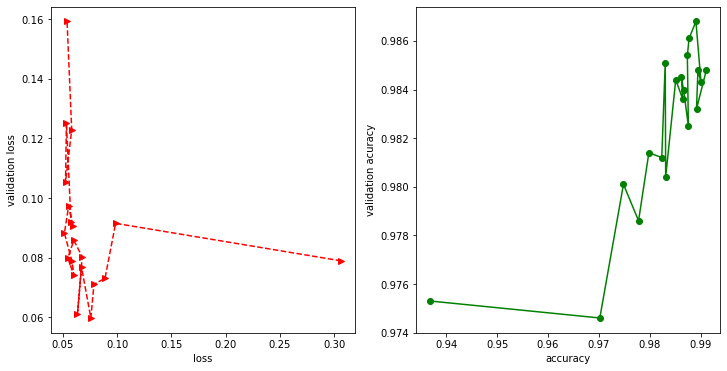

In [165]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1,)
plt.plot(loss['loss'],loss['val_loss'],'-->',color = 'red')
plt.xlabel('loss')
plt.ylabel('validation loss')
plt.subplot(1,2,2)
plt.plot(loss['accuracy'],loss['val_accuracy'],'-o',color = 'green')
plt.xlabel('accuracy')
plt.ylabel('validation acuracy')

In [166]:
results = model.evaluate(x_test,y_test,batch_size=20)

500/500 [==============================] - 4s 8ms/step - loss: 0.1592 - accuracy: 0.9848


In [167]:
print('test accuracy {}%'.format(results[1]*100))
print('test loss {}%'.format(results[0]*100))

test accuracy 98.47999811172485%
test loss 15.915577113628387%


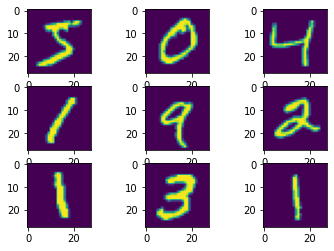

In [168]:
imgs = x_train.reshape(60000,28,28)
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(imgs[i])
plt.show()

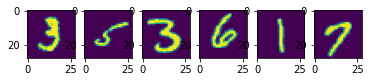

In [169]:
plt.subplot(2,6,1)
plt.imshow(imgs[10])
plt.subplot(2,6,2)
plt.imshow(imgs[11])
plt.subplot(2,6,3)
plt.imshow(imgs[12])
plt.subplot(2,6,4)
plt.imshow(imgs[13])
plt.subplot(2,6,5)
plt.imshow(imgs[14])
plt.subplot(2,6,6)
plt.imshow(imgs[15])

In [170]:
prediction = model.predict_classes(x_test)

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



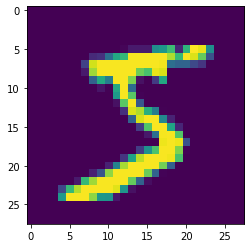

In [172]:
plt.imshow(imgs[0])

In [173]:
model.predict_classes(imgs[0].reshape(1,28,28,1))

array([5], dtype=int64)

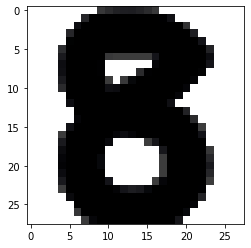

In [174]:
my_image = '8.png'
my_imgs = imread(my_image)
plt.imshow(my_imgs.reshape(28,28,3))

In [175]:
print(model.predict_classes(my_imgs.reshape(3,28,28,1))[0])

8


In [178]:
save_model(model,'mnist.h5')